In [39]:
import pandas as pd

transactionData = 'QVI_transaction_data.xlsx'
df_transactionData = pd.read_excel(transactionData)

customerData = 'QVI_purchase_behaviour.csv'
df_customerData = pd.read_csv(customerData)

In [43]:
numeric_columns = ['STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR', 'PROD_QTY', 'TOT_SALES']  

date_columns = ['DATE']  

numeric_check = df_transactionData[numeric_columns].applymap(lambda x: isinstance(x, (int, float)))

date_check = pd.to_datetime(df['DATE'], errors='coerce', format='%Y-%m-%d')

print("Numeric Check for Transaction Data:")
print(numeric_check)

print("\nDate Format Check for Transaction Data:")
print(date_check)


Numeric Check for Transaction Data:
        STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  PROD_QTY  TOT_SALES
0            True            True    True      True      True       True
1            True            True    True      True      True       True
2            True            True    True      True      True       True
3            True            True    True      True      True       True
4            True            True    True      True      True       True
...           ...             ...     ...       ...       ...        ...
264831       True            True    True      True      True       True
264832       True            True    True      True      True       True
264833       True            True    True      True      True       True
264834       True            True    True      True      True       True
264835       True            True    True      True      True       True

[264836 rows x 6 columns]

Date Format Check for Transaction Data:
0        2018-10-17


In [44]:
product_summary = df['PROD_NAME'].value_counts()

print("Summary of PROD_NAME:")
print(product_summary)

Summary of PROD_NAME:
PROD_NAME
Kettle Mozzarella   Basil & Pesto 175g      3304
Kettle Tortilla ChpsHny&Jlpno Chili 150g    3296
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    3269
Tyrrells Crisps     Ched & Chives 165g      3268
Cobs Popd Sea Salt  Chips 110g              3265
                                            ... 
RRD Pc Sea Salt     165g                    1431
Woolworths Medium   Salsa 300g              1430
NCC Sour Cream &    Garden Chives 175g      1419
French Fries Potato Chips 175g              1418
WW Crinkle Cut      Original 175g           1410
Name: count, Length: 114, dtype: int64


In [45]:
import re

product_words = ' '.join(df['PROD_NAME'].str.replace('[^a-zA-Z\s]', '').str.split().sum())

product_words = ' '.join(re.findall(r'\b\w+\b', product_words))

word_counts = pd.Series(product_words.split()).value_counts().reset_index()      #Took 42.2s to execute
word_counts.columns = ['word', 'frequency']

sorted_words = word_counts.sort_values(by='frequency', ascending=False)

print("Sorted Words by Frequency:")
print(sorted_words)


Sorted Words by Frequency:
         word  frequency
0        175g      60561
1       Chips      49770
2        150g      41633
3      Kettle      41288
4      Smiths      28860
..        ...        ...
220  Sunbites       1432
221        Pc       1431
222    Garden       1419
223       NCC       1419
224     Fries       1418

[225 rows x 2 columns]


In [47]:
df_chips = df[~df['PROD_NAME'].str.contains('salsa', case=False)]

In [48]:
summary_stats = df_chips.describe()

null_info = df_chips.info()

print("Summary Statistics:")
print(summary_stats)

print("\nNull Information:")
print(null_info)

<class 'pandas.core.frame.DataFrame'>
Index: 246742 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            246742 non-null  datetime64[ns]
 1   STORE_NBR       246742 non-null  int64         
 2   LYLTY_CARD_NBR  246742 non-null  int64         
 3   TXN_ID          246742 non-null  int64         
 4   PROD_NBR        246742 non-null  int64         
 5   PROD_NAME       246742 non-null  object        
 6   PROD_QTY        246742 non-null  int64         
 7   TOT_SALES       246742 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 16.9+ MB
Summary Statistics:
                                DATE      STORE_NBR  LYLTY_CARD_NBR  \
count                         246742  246742.000000    2.467420e+05   
mean   2018-12-30 01:19:01.211467520     135.051098    1.355310e+05   
min              2018-07-01 00:00:00       1.00000

In [49]:
outlier_transactions = df_chips[df_chips['PROD_QTY'] == 200]

print("Transactions with 200 Packets of Chips:")
print(outlier_transactions)

Transactions with 200 Packets of Chips:
            DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
69762 2018-08-19        226          226000  226201         4   
69763 2019-05-20        226          226000  226210         4   

                              PROD_NAME  PROD_QTY  TOT_SALES  
69762  Dorito Corn Chp     Supreme 380g       200      650.0  
69763  Dorito Corn Chp     Supreme 380g       200      650.0  


In [50]:
customer_id = outlier_transactions['LYLTY_CARD_NBR'].iloc[0]

other_transactions_by_customer = df_chips[df_chips['LYLTY_CARD_NBR'] == customer_id]

print("Other Transactions by the Same Customer:")
print(other_transactions_by_customer)

Other Transactions by the Same Customer:
            DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
69762 2018-08-19        226          226000  226201         4   
69763 2019-05-20        226          226000  226210         4   

                              PROD_NAME  PROD_QTY  TOT_SALES  
69762  Dorito Corn Chp     Supreme 380g       200      650.0  
69763  Dorito Corn Chp     Supreme 380g       200      650.0  


In [51]:
customer_id = outlier_transactions['LYLTY_CARD_NBR'].iloc[0]

df_filtered = df_chips[df_chips['LYLTY_CARD_NBR'] != customer_id]

summary_stats_filtered = df_filtered.describe()

null_info_filtered = df_filtered.info()

print("Summary Statistics (After Filtering):")
print(summary_stats_filtered)

print("\nNull Information (After Filtering):")
print(null_info_filtered)

<class 'pandas.core.frame.DataFrame'>
Index: 246740 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            246740 non-null  datetime64[ns]
 1   STORE_NBR       246740 non-null  int64         
 2   LYLTY_CARD_NBR  246740 non-null  int64         
 3   TXN_ID          246740 non-null  int64         
 4   PROD_NBR        246740 non-null  int64         
 5   PROD_NAME       246740 non-null  object        
 6   PROD_QTY        246740 non-null  int64         
 7   TOT_SALES       246740 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 16.9+ MB
Summary Statistics (After Filtering):
                                DATE      STORE_NBR  LYLTY_CARD_NBR  \
count                         246740  246740.000000    2.467400e+05   
mean   2018-12-30 01:18:58.448569344     135.050361    1.355303e+05   
min              2018-07-01 00:0

In [52]:
df_filtered['DATE'] = pd.to_datetime(df_filtered['DATE'])

transactions_by_date = df_filtered.groupby('DATE').size().reset_index(name='Transaction_Count')

print("Transaction Count by Date:")
print(transactions_by_date)

Transaction Count by Date:
          DATE  Transaction_Count
0   2018-07-01                663
1   2018-07-02                650
2   2018-07-03                674
3   2018-07-04                669
4   2018-07-05                660
..         ...                ...
359 2019-06-26                657
360 2019-06-27                669
361 2019-06-28                673
362 2019-06-29                703
363 2019-06-30                704

[364 rows x 2 columns]


/var/folders/rc/33mvhtrn2qjbk_2zxqdxz1000000gn/T/ipykernel_42430/1787090736.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['DATE'] = pd.to_datetime(df_filtered['DATE'])


In [53]:
import numpy as np

date_sequence = pd.date_range(start='2018-07-01', end='2019-06-30', freq='D')

date_df = pd.DataFrame({'DATE': date_sequence})

merged_df = pd.merge(date_df, transactions_by_date, on='DATE', how='left').fillna(0)

print("Merged DataFrame:")
print(merged_df)

Merged DataFrame:
          DATE  Transaction_Count
0   2018-07-01              663.0
1   2018-07-02              650.0
2   2018-07-03              674.0
3   2018-07-04              669.0
4   2018-07-05              660.0
..         ...                ...
360 2019-06-26              657.0
361 2019-06-27              669.0
362 2019-06-28              673.0
363 2019-06-29              703.0
364 2019-06-30              704.0

[365 rows x 2 columns]


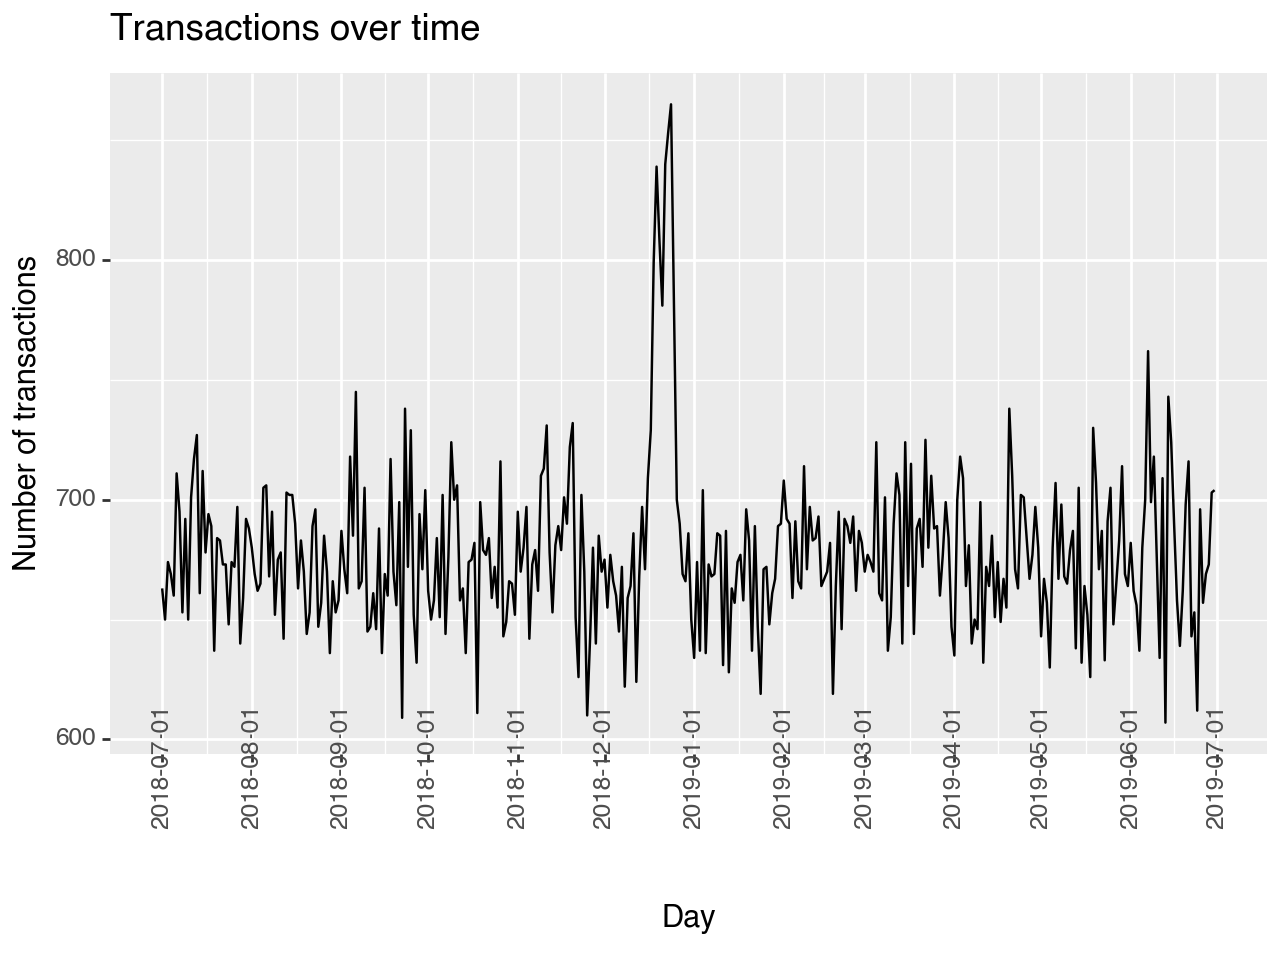

In [61]:
from plotnine import ggplot, aes, geom_line, labs, theme, scale_x_date, element_text

plot = (
    ggplot(transactions_by_date, aes(x='DATE', y='Transaction_Count')) +
    geom_line() +
    labs(x="Day", y="Number of transactions", title="Transactions over time") +
    scale_x_date(breaks="1 month") +
    theme(axis_text_x=element_text(angle=90, vjust=0.5))
)

print(plot)
